In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist #讀data

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[87]
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_train.shape

(60000, 28, 28)

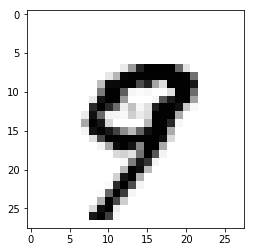

In [8]:
plt.imshow(x_train[87], cmap="Greys") #用灰階方式畫出來

In [9]:
y_train[87]

9

In [10]:
x_train[87].shape

(28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)    #將28*28的矩陣變成一列

In [13]:
x_train[87].shape

(784,)

In [14]:
from keras.utils import np_utils

In [15]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)  #將輸出結果分類,one hot encoding

In [16]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import  SGD

### model_1 上課範例

In [18]:
model_1=Sequential()

In [19]:
model_1.add(Dense(4,input_dim=784))
model_1.add(Activation('sigmoid'))

In [20]:
model_1.add(Dense(2))
model_1.add(Activation('sigmoid'))

In [21]:
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [22]:
 model_1.compile(loss = 'mse', 
              optimizer = SGD(lr=0.087),
              metrics = ["accuracy"])

In [23]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_1_20=model_1.fit(x_train,y_train,batch_size=100,epochs=20,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0898 - acc: 0.0975 - val_loss: 0.0895 - val_acc: 0.0974
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0893 - acc: 0.1111 - val_loss: 0.0891 - val_acc: 0.1465
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0890 - acc: 0.1472 - val_loss: 0.0889 - val_acc: 0.2006
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0888 - acc: 0.2108 - val_loss: 0.0887 - val_acc: 0.2000
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0886 - acc: 0.2060 - val_loss: 0.0886 - val_acc: 0.2066
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0885 - acc: 0.2135 - val_loss: 0.0884 - val_acc: 0.2151
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0883 - acc: 0.2217 - val_loss: 0.0882 - val_acc

In [25]:
score=model_1.evaluate(x_test,y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

10000/10000 [==============================] - 0s 31us/step
測試資料的 loss: 0.08544830396175385
測試資料正確率: 0.2978


### model_2 改良後

In [26]:
x_train_1=x_train/x_train.max()
x_test_1=x_test/x_test.max()  #正規化

In [27]:
x_train_1.max()

1.0

#### 更改神經元數量變成 100個神經元，層數改為3層，Activation function: Relu 

In [28]:
model_2=Sequential()

model_2.add(Dense(100,input_dim=784))
model_2.add(Activation('relu'))

model_2.add(Dense(100))
model_2.add(Activation('relu'))

model_2.add(Dense(100))
model_2.add(Activation('relu'))


model_2.add(Dense(10))
model_2.add(Activation('softmax'))


model_2.compile(loss = 'mse', 
              optimizer =SGD(lr=0.087),
              metrics = ["accuracy"])

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
__________

### epoch更改成30

In [29]:
model_2_20=model_2.fit(x_train_1,y_train,batch_size=100,epochs=20,verbose=1,validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0866 - acc: 0.2655 - val_loss: 0.0804 - val_acc: 0.5208
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0638 - acc: 0.6551 - val_loss: 0.0433 - val_acc: 0.7494
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0347 - acc: 0.7885 - val_loss: 0.0265 - val_acc: 0.8500
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0235 - acc: 0.8602 - val_loss: 0.0195 - val_acc: 0.8801
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0189 - acc: 0.8837 - val_loss: 0.0167 - val_acc: 0.8933
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0166 - acc: 0.8953 - val_loss: 0.0152 - val_acc: 0.9025
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0152 - acc: 0.9036 - val_loss: 0.0140 - val_acc

### 將正確率與訓練次數化成圖

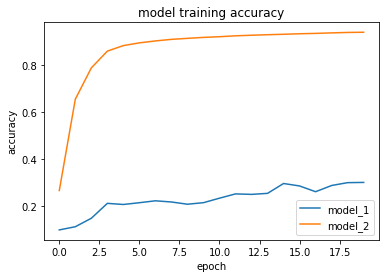

In [30]:
plt.plot(model_1_20.history['acc'])
plt.plot(model_2_20.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') #訓練次數
plt.legend(['model_1','model_2'],loc='best')
plt.show()

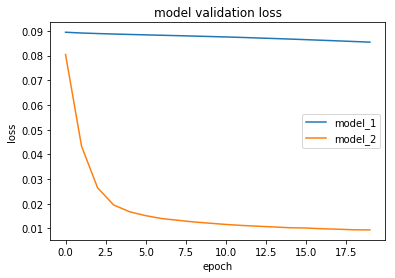

In [31]:
plt.plot(model_1_20.history['val_loss'])
plt.plot(model_2_20.history['val_loss'])

plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch') #訓練次數
plt.legend(['model_1','model_2'],loc='best')
plt.show()

In [32]:
from ipywidgets import interact_manual

In [33]:
predict = model_2.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [34]:
def test(數字):
    plt.imshow(x_test[數字].reshape(28,28),cmap='Greys')
    print('神經網路判斷為:',predict[數字])

In [36]:
interact_manual(test,數字=(0,9999))

interactive(children=(IntSlider(value=4999, description='數字', max=9999), Button(description='Run Interact', st…

<function __main__.test(數字)>

In [42]:
score=model_2.evaluate(x_test,y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

10000/10000 [==============================] - 0s 32us/step
測試資料的 loss: 0.013308131605071546
測試資料正確率: 0.9333


#### 儲存成JSON格式

In [46]:
model_json=model_2.to_json()
open('first_model.json','w').write(model_json)
model_2.save_weights('first_model_weights.h5')